### **Breast cancer**



Importar las librerias y entrar a donde está el input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/tesisJohannaStepanian/ML/step2_mergedCounts_ancestry_subtypes

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1Rb0U_on_je-YZF0eGDbrcqcgLCDA0OtG/tesisJohannaStepanian/ML/step2_mergedCounts_ancestry_subtypes


**Dataset**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, callbacks

In [ ]:
breast_cancer = pd.read_csv('mostVariantGenes_ancestry_normalizedcounts.csv')
breast_cancer.head()


,sample,K2.1,K2.2,K3.1,K3.2,K3.3,K4.1,K4.2,K4.3,K4.4,...,gene-LOC107987206|LOC107987206,gene-LOC112268313|LOC112268313,gene-ALB|ALB,06S10197329_S4_L001.39174|ND6,subtype,subtype.proba.Basal,subtype.proba.Her2,subtype.proba.LumA,subtype.proba.LumB,subtype.proba.Normal
0,06S10197329_S4_L003,0.968868,0.031132,0.037672,0.936120,0.026208,0.048288,0.923092,0.028610,0.00001,...,0.0,443.17921,13.63628,33.23844,LumB,0.0,0.433383,0.0,0.566617,0.0
1,06S10197329_S4_L004,0.967888,0.032112,0.033182,0.939076,0.027742,0.042181,0.929105,0.028703,0.00001,...,0.0,441.47100,10.78951,25.17553,LumB,0.0,0.424047,0.0,0.575953,0.0
2,06S18074953_S3_L001,0.964684,0.035316,0.000010,0.974376,0.025614,0.000010,0.972885,0.027095,0.00001,...,0.0,257.61280,0.00000,39.48809,LumB,0.0,0.345383,0.0,0.654617,0.0
3,06S18074953_S3_L002,0.963306,0.036694,0.000010,0.972688,0.027302,0.000010,0.972126,0.027854,0.00001,...,0.0,275.78854,11.61215,50.31931,LumB,0.0,0.323875,0.0,0.676125,0.0
4,06S18074953_S3_L003,0.961074,0.038926,0.000010,0.971778,0.028212,0.000010,0.971502,0.028478,0.00001,...,0.0,252.92926,11.91333,43.98770,LumB,0.0,0.336832,0.0,0.663168,0.0


In [ ]:
print(breast_cancer['subtype'].unique())

['LumB' 'Basal' 'Her2' 'LumA' 'Normal']


In [ ]:
#Cambiar los subtypos de categorico a numerico
subtipoNumerico = {'LumB': 1, 'Basal': 2, 'Her2': 3, 'LumA':4, 'Normal':5}
breast_cancer['subtype'] = breast_cancer['subtype'].replace(subtipoNumerico)
breast_cancer.head()


,sample,K2.1,K2.2,K3.1,K3.2,K3.3,K4.1,K4.2,K4.3,K4.4,...,gene-LOC107987206|LOC107987206,gene-LOC112268313|LOC112268313,gene-ALB|ALB,06S10197329_S4_L001.39174|ND6,subtype,subtype.proba.Basal,subtype.proba.Her2,subtype.proba.LumA,subtype.proba.LumB,subtype.proba.Normal
0,06S10197329_S4_L003,0.968868,0.031132,0.037672,0.936120,0.026208,0.048288,0.923092,0.028610,0.00001,...,0.0,443.17921,13.63628,33.23844,1,0.0,0.433383,0.0,0.566617,0.0
1,06S10197329_S4_L004,0.967888,0.032112,0.033182,0.939076,0.027742,0.042181,0.929105,0.028703,0.00001,...,0.0,441.47100,10.78951,25.17553,1,0.0,0.424047,0.0,0.575953,0.0
2,06S18074953_S3_L001,0.964684,0.035316,0.000010,0.974376,0.025614,0.000010,0.972885,0.027095,0.00001,...,0.0,257.61280,0.00000,39.48809,1,0.0,0.345383,0.0,0.654617,0.0
3,06S18074953_S3_L002,0.963306,0.036694,0.000010,0.972688,0.027302,0.000010,0.972126,0.027854,0.00001,...,0.0,275.78854,11.61215,50.31931,1,0.0,0.323875,0.0,0.676125,0.0
4,06S18074953_S3_L003,0.961074,0.038926,0.000010,0.971778,0.028212,0.000010,0.971502,0.028478,0.00001,...,0.0,252.92926,11.91333,43.98770,1,0.0,0.336832,0.0,0.663168,0.0


In [ ]:
breast_cancer['subtype'].value_counts()

2    115
1     61
4     56
5     46
3     45
Name: subtype, dtype: int64

In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Columns: 118 entries, sample to subtype.proba.Normal
dtypes: float64(116), int64(1), object(1)
memory usage: 297.9+ KB


In [ ]:
breast_cancer.keys()

Index(['sample', 'K2.1', 'K2.2', 'K3.1', 'K3.2', 'K3.3', 'K4.1', 'K4.2',
       'K4.3', 'K4.4',
       ...
       'gene-LOC107987206|LOC107987206', 'gene-LOC112268313|LOC112268313',
       'gene-ALB|ALB', '06S10197329_S4_L001.39174|ND6', 'subtype',
       'subtype.proba.Basal', 'subtype.proba.Her2', 'subtype.proba.LumA',
       'subtype.proba.LumB', 'subtype.proba.Normal'],
      dtype='object', length=118)

In [ ]:
breast_cancer.describe()

,K2.1,K2.2,K3.1,K3.2,K3.3,K4.1,K4.2,K4.3,K4.4,K5.1,...,gene-LOC107987206|LOC107987206,gene-LOC112268313|LOC112268313,gene-ALB|ALB,06S10197329_S4_L001.39174|ND6,subtype,subtype.proba.Basal,subtype.proba.Her2,subtype.proba.LumA,subtype.proba.LumB,subtype.proba.Normal
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,...,3.230000e+02,323.000000,3.230000e+02,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,0.860216,0.139784,0.086891,0.776178,0.136931,0.082513,0.871273,0.137005,0.039109,0.064637,...,6.913243e+03,5253.677052,6.700825e+03,11760.836052,2.724458,0.268105,0.206902,0.180808,0.224668,0.119517
std,0.293164,0.293164,0.235690,0.348306,0.290476,0.234285,2.320155,0.289550,0.086527,0.224158,...,1.177181e+05,12961.550709,9.435421e+04,27844.188128,1.335698,0.338914,0.213520,0.259078,0.255253,0.216991
min,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000000e+00,0.000000,0.000000e+00,11.312860,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.964245,0.000010,0.000010,0.687377,0.000010,0.000010,0.597107,0.000010,0.000010,0.000010,...,0.000000e+00,83.693840,3.231813e+00,74.728515,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.998603,0.001397,0.004601,0.974933,0.000010,0.000010,0.929289,0.000010,0.000015,0.000010,...,3.791082e+00,253.615330,1.472191e+01,2065.407000,2.000000,0.000000,0.170995,0.000000,0.123366,0.000000
75%,0.999990,0.035755,0.033385,0.999980,0.028953,0.028293,0.972962,0.030151,0.041989,0.018127,...,5.746402e+01,4439.395500,5.508179e+01,9646.279500,4.000000,0.602215,0.329832,0.419516,0.372549,0.086970
max,0.999990,0.999990,0.999980,0.999980,0.999980,0.999970,42.000000,0.999970,0.757946,0.999960,...,2.114979e+06,108514.900000,1.654982e+06,282475.000000,5.000000,1.000000,1.000000,0.938007,1.000000,0.657955


In [ ]:
# Revisar columnas sin varianza
#print(breast_cancer.var())
varianza_cero = breast_cancer.var()==0
columnas_varianza_cero = varianza_cero[varianza_cero == True].index
print(columnas_varianza_cero)

Index([], dtype='object')


<ipython-input-11-734a43a483c4>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  varianza_cero = breast_cancer.var()==0


In [ ]:
corr_matrix = breast_cancer.corr()
print(corr_matrix)

                          K2.1      K2.2      K3.1      K3.2      K3.3  \
K2.1                  1.000000 -1.000000  0.137335  0.740979 -0.999933   
K2.2                 -1.000000  1.000000 -0.137335 -0.740979  0.999933   
K3.1                  0.137335 -0.137335  1.000000 -0.563335 -0.135905   
K3.2                  0.740979 -0.740979 -0.563335  1.000000 -0.742002   
K3.3                 -0.999933  0.999933 -0.135905 -0.742002  1.000000   
...                        ...       ...       ...       ...       ...   
subtype.proba.Basal  -0.241700  0.241700 -0.009321 -0.194937  0.241310   
subtype.proba.Her2   -0.016516  0.016516 -0.010783 -0.005203  0.014988   
subtype.proba.LumA    0.150055 -0.150055 -0.050722  0.158470 -0.148863   
subtype.proba.LumB    0.181710 -0.181710  0.020816  0.138186 -0.182587   
subtype.proba.Normal  0.000848 -0.000848  0.061244 -0.042170  0.000872   

                          K4.1      K4.2      K4.3      K4.4      K5.1  ...  \
K2.1                  0.131172 -

<Axes: >

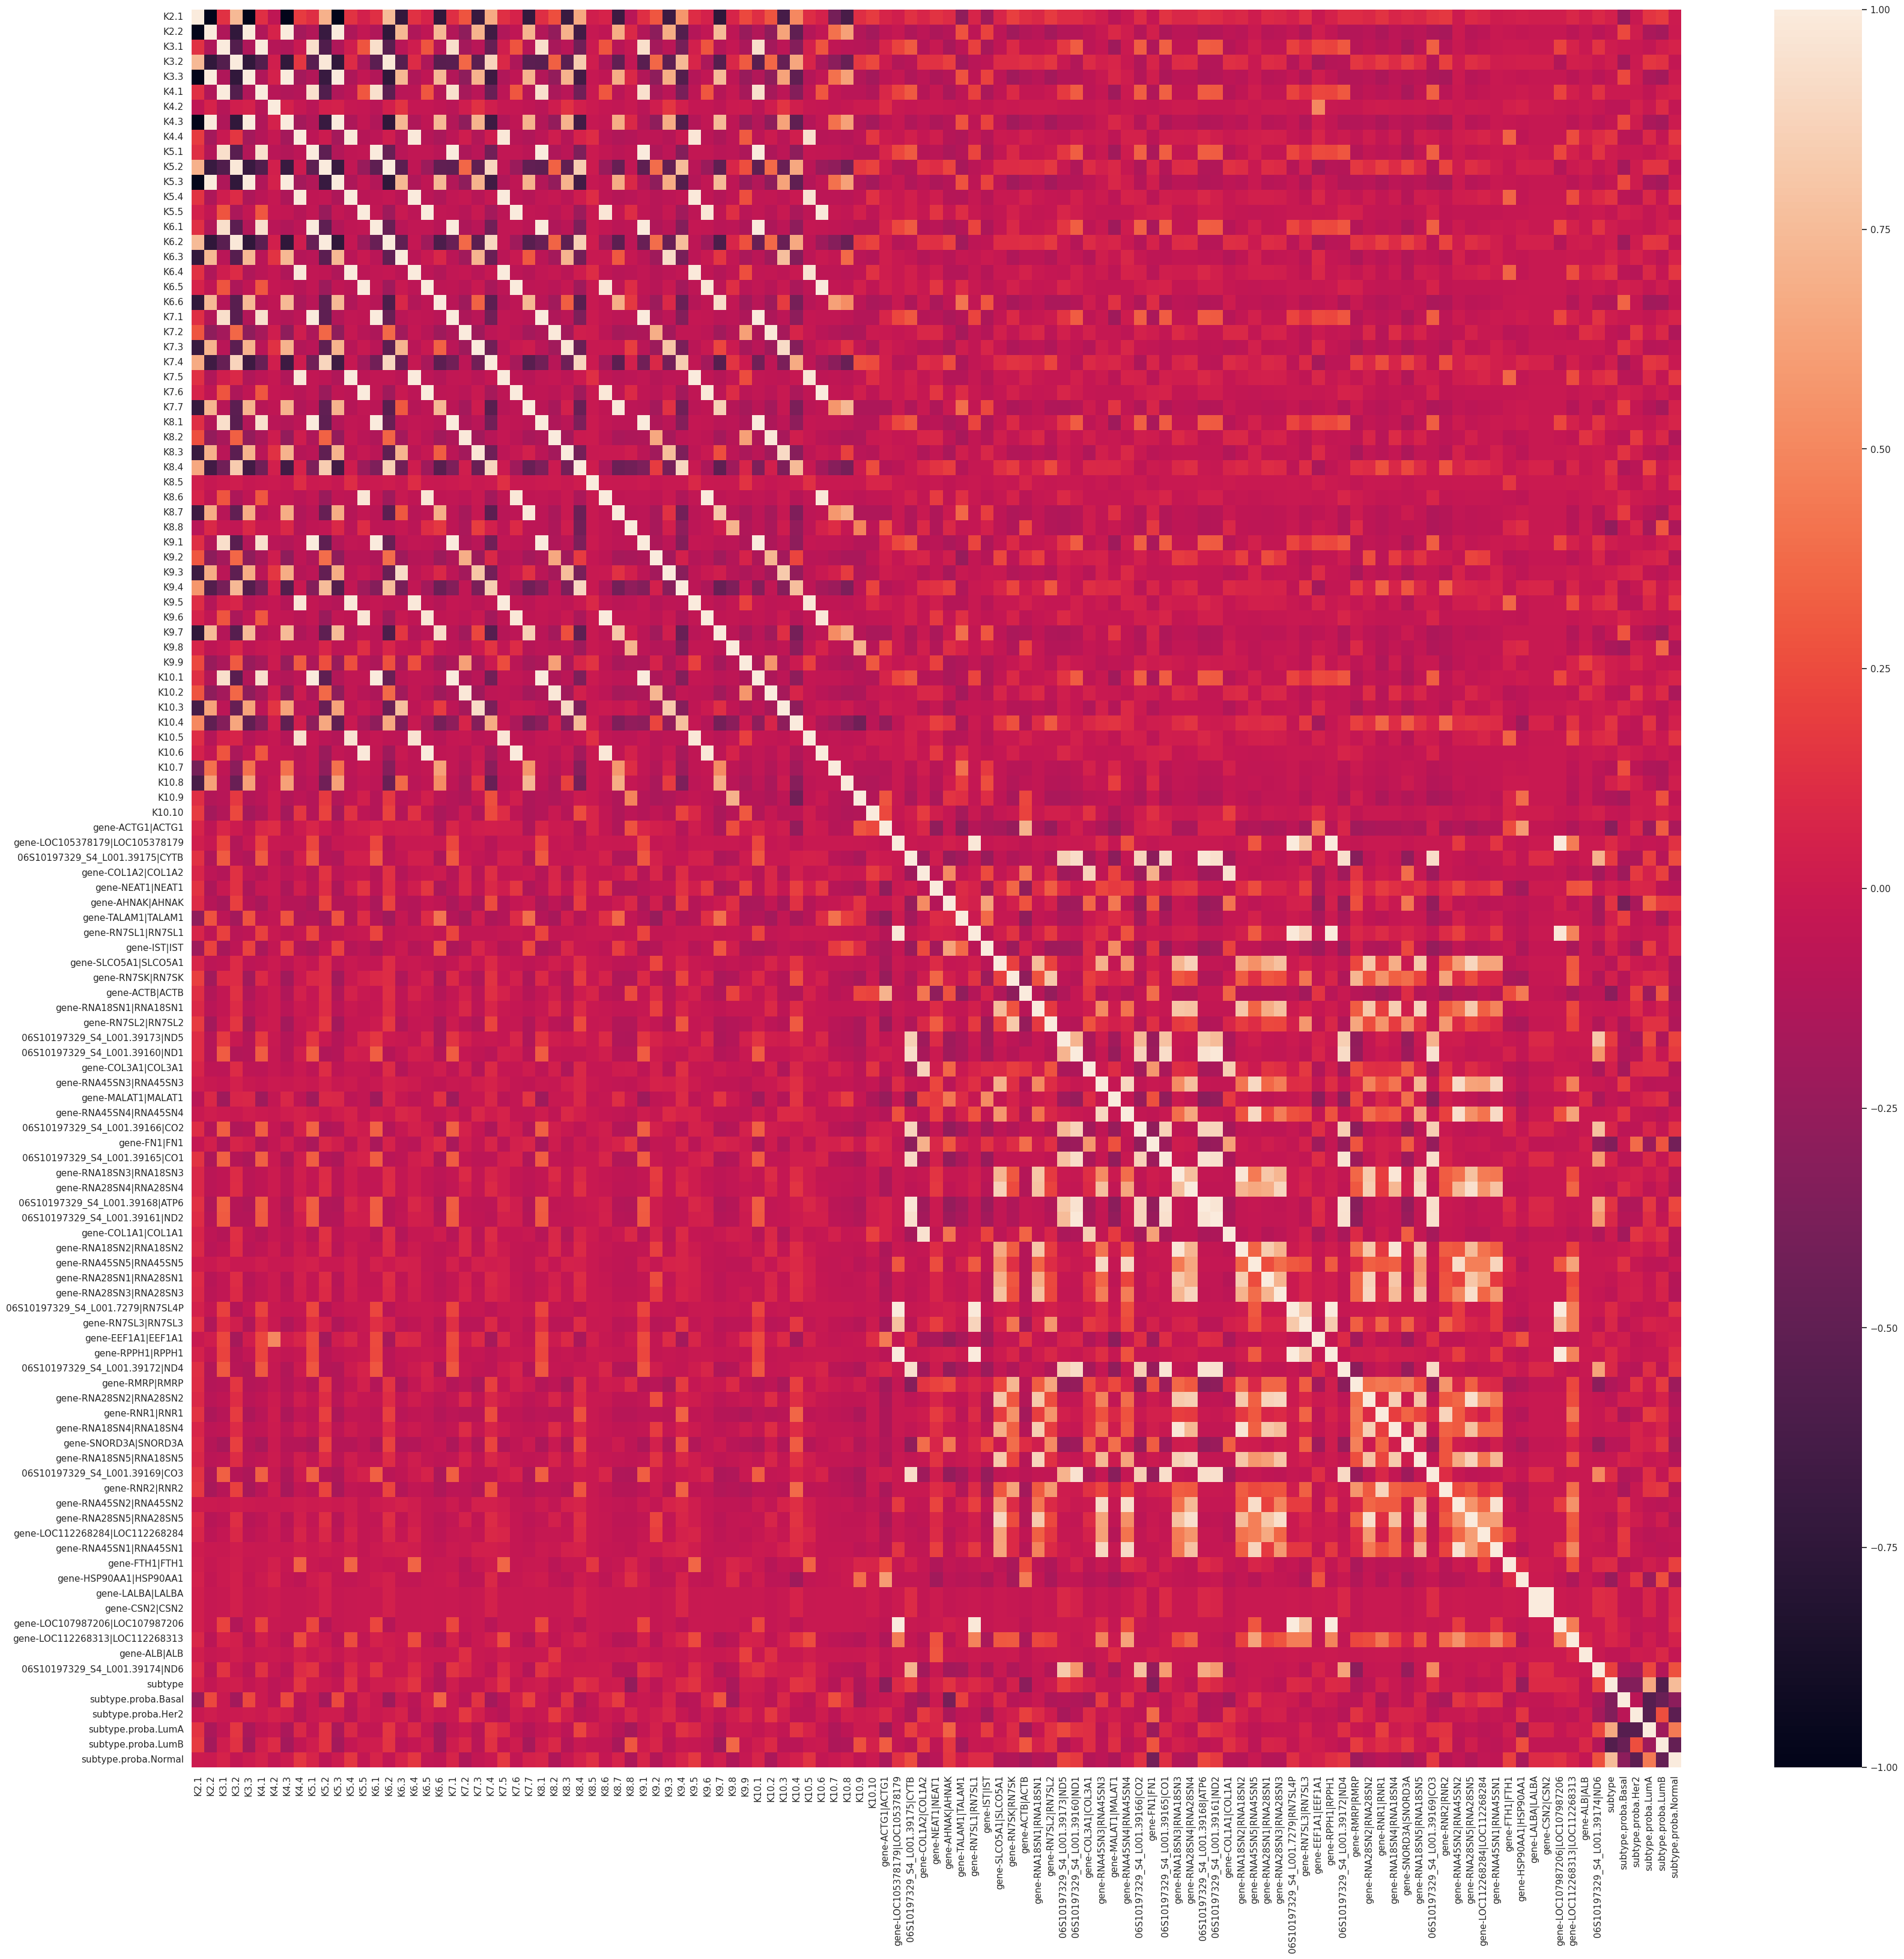

In [ ]:
sns.set(rc={'figure.figsize':(40,38)})
sns.heatmap(corr_matrix,
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


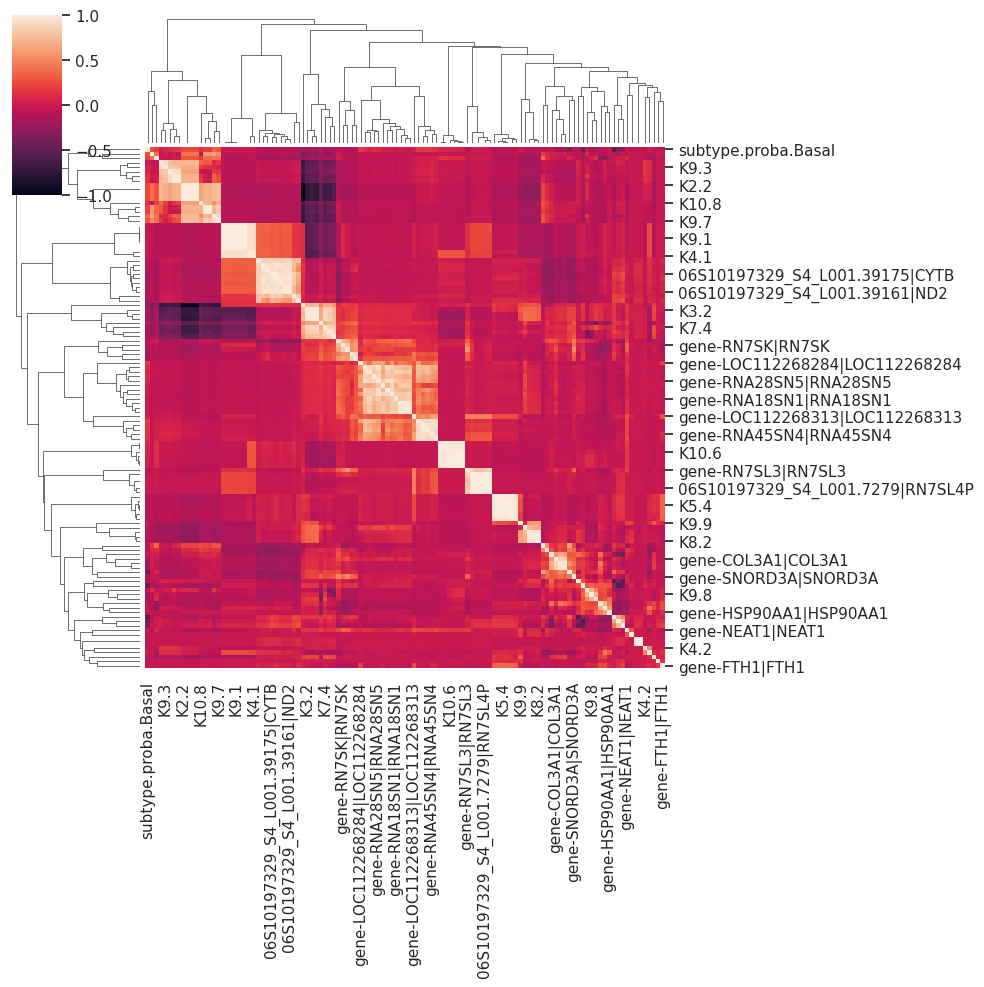

In [ ]:
sns.set(rc={'figure.figsize':(40,38)})
sns.clustermap(corr_matrix)


In [ ]:
#tomar las variables correlacionadas e imprimir aquellas que se descartan
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop
#Las borro o las dejo? Si quitarlas :)

<ipython-input-15-3bbd0ab3da2d>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['K3.3',
 'K4.1',
 'K4.3',
 'K5.2',
 'K5.3',
 'K5.4',
 'K6.1',
 'K6.2',
 'K6.4',
 'K6.5',
 'K7.1',
 'K7.5',
 'K7.6',
 'K8.1',
 'K8.2',
 'K8.3',
 'K8.6',
 'K8.7',
 'K9.1',
 'K9.5',
 'K9.6',
 'K10.1',
 'K10.2',
 'K10.5',
 'K10.6',
 'gene-RN7SL1|RN7SL1',
 '06S10197329_S4_L001.39168|ATP6',
 '06S10197329_S4_L001.39161|ND2',
 'gene-RNA18SN2|RNA18SN2',
 '06S10197329_S4_L001.7279|RN7SL4P',
 'gene-RPPH1|RPPH1',
 '06S10197329_S4_L001.39172|ND4',
 'gene-RNA18SN4|RNA18SN4',
 'gene-RNA45SN1|RNA45SN1',
 'gene-CSN2|CSN2',
 'gene-LOC107987206|LOC107987206']

In [ ]:
#Crear una matriz donde se borraran las variables
breast_cancer_nonanticorrelated = breast_cancer
breast_cancer_nonanticorrelated.describe()

,K2.1,K2.2,K3.1,K3.2,K3.3,K4.1,K4.2,K4.3,K4.4,K5.1,...,gene-LOC107987206|LOC107987206,gene-LOC112268313|LOC112268313,gene-ALB|ALB,06S10197329_S4_L001.39174|ND6,subtype,subtype.proba.Basal,subtype.proba.Her2,subtype.proba.LumA,subtype.proba.LumB,subtype.proba.Normal
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,...,3.230000e+02,323.000000,3.230000e+02,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,0.860216,0.139784,0.086891,0.776178,0.136931,0.082513,0.871273,0.137005,0.039109,0.064637,...,6.913243e+03,5253.677052,6.700825e+03,11760.836052,2.724458,0.268105,0.206902,0.180808,0.224668,0.119517
std,0.293164,0.293164,0.235690,0.348306,0.290476,0.234285,2.320155,0.289550,0.086527,0.224158,...,1.177181e+05,12961.550709,9.435421e+04,27844.188128,1.335698,0.338914,0.213520,0.259078,0.255253,0.216991
min,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000000e+00,0.000000,0.000000e+00,11.312860,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.964245,0.000010,0.000010,0.687377,0.000010,0.000010,0.597107,0.000010,0.000010,0.000010,...,0.000000e+00,83.693840,3.231813e+00,74.728515,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.998603,0.001397,0.004601,0.974933,0.000010,0.000010,0.929289,0.000010,0.000015,0.000010,...,3.791082e+00,253.615330,1.472191e+01,2065.407000,2.000000,0.000000,0.170995,0.000000,0.123366,0.000000
75%,0.999990,0.035755,0.033385,0.999980,0.028953,0.028293,0.972962,0.030151,0.041989,0.018127,...,5.746402e+01,4439.395500,5.508179e+01,9646.279500,4.000000,0.602215,0.329832,0.419516,0.372549,0.086970
max,0.999990,0.999990,0.999980,0.999980,0.999980,0.999970,42.000000,0.999970,0.757946,0.999960,...,2.114979e+06,108514.900000,1.654982e+06,282475.000000,5.000000,1.000000,1.000000,0.938007,1.000000,0.657955


In [ ]:
#Borrar las variables
for i in to_drop:
  del breast_cancer_nonanticorrelated[i]
breast_cancer_nonanticorrelated.describe()

,K2.1,K2.2,K3.1,K3.2,K4.2,K4.4,K5.1,K5.5,K6.3,K6.6,...,gene-LALBA|LALBA,gene-LOC112268313|LOC112268313,gene-ALB|ALB,06S10197329_S4_L001.39174|ND6,subtype,subtype.proba.Basal,subtype.proba.Her2,subtype.proba.LumA,subtype.proba.LumB,subtype.proba.Normal
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,...,3.230000e+02,323.000000,3.230000e+02,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,0.860216,0.139784,0.086891,0.776178,0.871273,0.039109,0.064637,0.029337,0.066945,0.088630,...,4.818119e+03,5253.677052,6.700825e+03,11760.836052,2.724458,0.268105,0.206902,0.180808,0.224668,0.119517
std,0.293164,0.293164,0.235690,0.348306,2.320155,0.086527,0.224158,0.113385,0.195323,0.247022,...,8.487020e+04,12961.550709,9.435421e+04,27844.188128,1.335698,0.338914,0.213520,0.259078,0.255253,0.216991
min,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000000e+00,0.000000,0.000000e+00,11.312860,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.964245,0.000010,0.000010,0.687377,0.597107,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000000e+00,83.693840,3.231813e+00,74.728515,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.998603,0.001397,0.004601,0.974933,0.929289,0.000015,0.000010,0.000010,0.000010,0.000010,...,0.000000e+00,253.615330,1.472191e+01,2065.407000,2.000000,0.000000,0.170995,0.000000,0.123366,0.000000
75%,0.999990,0.035755,0.033385,0.999980,0.972962,0.041989,0.018127,0.012008,0.000016,0.018177,...,0.000000e+00,4439.395500,5.508179e+01,9646.279500,4.000000,0.602215,0.329832,0.419516,0.372549,0.086970
max,0.999990,0.999990,0.999980,0.999980,42.000000,0.757946,0.999960,0.950291,0.929844,0.999950,...,1.525307e+06,108514.900000,1.654982e+06,282475.000000,5.000000,1.000000,1.000000,0.938007,1.000000,0.657955


In [ ]:
#Remove sample names
del breast_cancer_nonanticorrelated['sample']
breast_cancer_nonanticorrelated.head()

,K2.1,K2.2,K3.1,K3.2,K4.2,K4.4,K5.1,K5.5,K6.3,K6.6,...,gene-LALBA|LALBA,gene-LOC112268313|LOC112268313,gene-ALB|ALB,06S10197329_S4_L001.39174|ND6,subtype,subtype.proba.Basal,subtype.proba.Her2,subtype.proba.LumA,subtype.proba.LumB,subtype.proba.Normal
0,0.968868,0.031132,0.037672,0.936120,0.923092,0.00001,0.045163,0.003486,0.000010,0.049351,...,0.0,443.17921,13.63628,33.23844,1,0.0,0.433383,0.0,0.566617,0.0
1,0.967888,0.032112,0.033182,0.939076,0.929105,0.00001,0.030383,0.014656,0.000010,0.050892,...,0.0,441.47100,10.78951,25.17553,1,0.0,0.424047,0.0,0.575953,0.0
2,0.964684,0.035316,0.000010,0.974376,0.972885,0.00001,0.000010,0.007391,0.025897,0.000010,...,0.0,257.61280,0.00000,39.48809,1,0.0,0.345383,0.0,0.654617,0.0
3,0.963306,0.036694,0.000010,0.972688,0.972126,0.00001,0.000010,0.000010,0.027485,0.000010,...,0.0,275.78854,11.61215,50.31931,1,0.0,0.323875,0.0,0.676125,0.0
4,0.961074,0.038926,0.000010,0.971778,0.971502,0.00001,0.000010,0.000010,0.028310,0.000010,...,0.0,252.92926,11.91333,43.98770,1,0.0,0.336832,0.0,0.663168,0.0


In [ ]:
#eliminar las columnas con probabilidades de subtipo
subtype_sample=['subtype.proba.Normal', 'subtype.proba.LumB', 'subtype.proba.LumA', 'subtype.proba.Her2', 'subtype.proba.Basal']
for s in subtype_sample:
  del breast_cancer_nonanticorrelated[s]
breast_cancer_nonanticorrelated.head()


,K2.1,K2.2,K3.1,K3.2,K4.2,K4.4,K5.1,K5.5,K6.3,K6.6,...,gene-RNA45SN2|RNA45SN2,gene-RNA28SN5|RNA28SN5,gene-LOC112268284|LOC112268284,gene-FTH1|FTH1,gene-HSP90AA1|HSP90AA1,gene-LALBA|LALBA,gene-LOC112268313|LOC112268313,gene-ALB|ALB,06S10197329_S4_L001.39174|ND6,subtype
0,0.968868,0.031132,0.037672,0.936120,0.923092,0.00001,0.045163,0.003486,0.000010,0.049351,...,4972.12979,130.39696,0.000000,59290.55966,28868.86395,0.0,443.17921,13.63628,33.23844,1
1,0.967888,0.032112,0.033182,0.939076,0.929105,0.00001,0.030383,0.014656,0.000010,0.050892,...,5384.86700,427.98410,0.899126,59863.82000,29804.24000,0.0,441.47100,10.78951,25.17553,1
2,0.964684,0.035316,0.000010,0.974376,0.972885,0.00001,0.000010,0.007391,0.025897,0.000010,...,4751.73400,20828.09000,0.000000,48685.06000,148613.40000,0.0,257.61280,0.00000,39.48809,1
3,0.963306,0.036694,0.000010,0.972688,0.972126,0.00001,0.000010,0.000010,0.027485,0.000010,...,3502.99824,20792.52020,0.000000,48301.70084,148214.56493,0.0,275.78854,11.61215,50.31931,1
4,0.961074,0.038926,0.000010,0.971778,0.971502,0.00001,0.000010,0.000010,0.028310,0.000010,...,3578.58248,153.95694,0.000000,48008.90622,146690.72358,0.0,252.92926,11.91333,43.98770,1


In [ ]:
#crear X y Y
X = breast_cancer_nonanticorrelated.drop('subtype', axis=1)
y= breast_cancer_nonanticorrelated['subtype']

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
318    2
319    2
320    2
321    1
322    1
Name: subtype, Length: 323, dtype: int64

In [ ]:
#Crear el conjunto de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,  y_test = train_test_split(X, y,
                                                 test_size = 0.30,
                                                 random_state = 33)

#X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state=20)
#X_val,X_test,y_val,y_test = train_test_split(X_test,y_test, test_size = 0.50, random_state=20)

### **SVM**

In [ ]:
#para que no salga un error mas adelante

X_train.dtypes

K2.1                              float64
K2.2                              float64
K3.1                              float64
K3.2                              float64
K4.2                              float64
                                   ...   
gene-HSP90AA1|HSP90AA1            float64
gene-LALBA|LALBA                  float64
gene-LOC112268313|LOC112268313    float64
gene-ALB|ALB                      float64
06S10197329_S4_L001.39174|ND6     float64
Length: 75, dtype: object

In [ ]:
# Ajustar el SVM en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 33)
classifier.fit(X_train, y_train)

SVC(random_state=33)

In [ ]:
#para que no salga un error mas adelante
#X_test = X_test.drop('sample',axis=1)
X_test.dtypes

K2.1                              float64
K2.2                              float64
K3.1                              float64
K3.2                              float64
K4.2                              float64
                                   ...   
gene-HSP90AA1|HSP90AA1            float64
gene-LALBA|LALBA                  float64
gene-LOC112268313|LOC112268313    float64
gene-ALB|ALB                      float64
06S10197329_S4_L001.39174|ND6     float64
Length: 75, dtype: object

In [ ]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test)
type(y_pred)

numpy.ndarray

In [ ]:
# Elaborar una matriz de confusión para SVM
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# Elaboración de funcion que genera las diferentes metricas rapidamente
def display_metrics(y_true, y_pred):
    '''
    y_true: El vector de la variable dependiente(target)
    y_pred: El vector con las predicciónes hechas por el dataset

    Calcula las diferentes métricas para evaluar el desempeño del modelo
    '''

    recall = recall_score(y_true, y_pred, average='macro')
    pres = precision_score(y_true, y_pred, average='macro')
    accur = accuracy_score(y_true, y_pred)
    f1_scr = f1_score(y_true, y_pred, average='macro')
    conf_mtx = confusion_matrix(y_true, y_pred)
    all_metric = classification_report(y_true, y_pred)

    print(f'Recall: {recall}')
    print(f'Precision: {pres}')
    print(f'Accuracy: {accur}')
    print(f'f1_score: {f1_scr}')
    print('\n')
    print('All metrics:')
    print(all_metric)
    print('\n')
    disp = ConfusionMatrixDisplay(conf_mtx)
    disp.plot()
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: 

Recall: 0.23157894736842105
Precision: 0.2
Accuracy: 0.4020618556701031
f1_score: 0.1642857142857143


All metrics:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.40      1.00      0.57        36
           3       0.00      0.00      0.00        12
           4       0.60      0.16      0.25        19
           5       0.00      0.00      0.00        13

    accuracy                           0.40        97
   macro avg       0.20      0.23      0.16        97
weighted avg       0.27      0.40      0.26        97





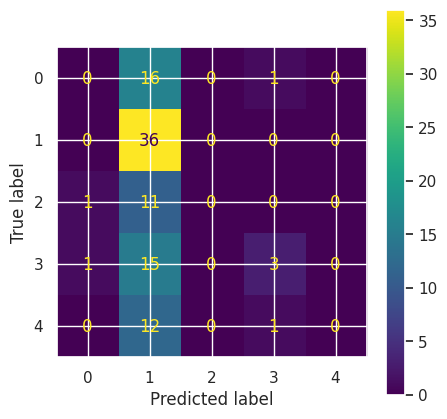

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
display_metrics(y_test, y_pred)

### **Random Forest**

In [ ]:
#se crea el modelo de random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
random_forest = RandomForestClassifier(n_estimators = 500, criterion='entropy', max_depth=None)
# Se entrena el modelo
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [ ]:
#Se hace la predeccion con el dataset de test
y_pred_test_rf = random_forest.predict(X_test)

Recall: 0.5423672302929268
Precision: 0.7273015873015873
Accuracy: 0.6391752577319587
f1_score: 0.546101434797087


All metrics:
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        17
           2       0.61      0.92      0.73        36
           3       1.00      0.08      0.15        12
           4       0.71      0.53      0.61        19
           5       0.70      0.54      0.61        13

    accuracy                           0.64        97
   macro avg       0.73      0.54      0.55        97
weighted avg       0.69      0.64      0.60        97





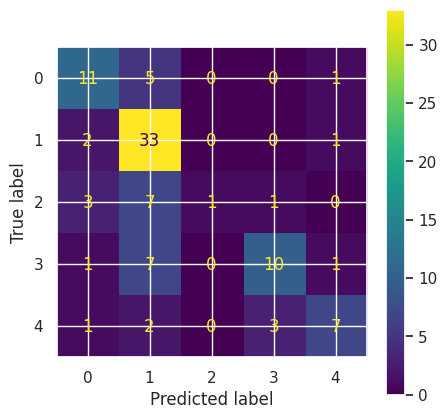

In [ ]:
# Elaborar una matriz de confusión para random forest
sns.set(rc={'figure.figsize':(5,5)})
display_metrics(y_test, y_pred_test_rf)

### Quitando todos los features de ancestría




In [ ]:
breast_cancer = pd.read_csv('mostVariantGenes_ancestry_normalizedcounts.csv')
breast_cancer.head()


,sample,K2.1,K2.2,K3.1,K3.2,K3.3,K4.1,K4.2,K4.3,K4.4,...,gene-LOC107987206|LOC107987206,gene-LOC112268313|LOC112268313,gene-ALB|ALB,06S10197329_S4_L001.39174|ND6,subtype,subtype.proba.Basal,subtype.proba.Her2,subtype.proba.LumA,subtype.proba.LumB,subtype.proba.Normal
0,06S10197329_S4_L003,0.968868,0.031132,0.037672,0.936120,0.026208,0.048288,0.923092,0.028610,0.00001,...,0.0,443.17921,13.63628,33.23844,LumB,0.0,0.433383,0.0,0.566617,0.0
1,06S10197329_S4_L004,0.967888,0.032112,0.033182,0.939076,0.027742,0.042181,0.929105,0.028703,0.00001,...,0.0,441.47100,10.78951,25.17553,LumB,0.0,0.424047,0.0,0.575953,0.0
2,06S18074953_S3_L001,0.964684,0.035316,0.000010,0.974376,0.025614,0.000010,0.972885,0.027095,0.00001,...,0.0,257.61280,0.00000,39.48809,LumB,0.0,0.345383,0.0,0.654617,0.0
3,06S18074953_S3_L002,0.963306,0.036694,0.000010,0.972688,0.027302,0.000010,0.972126,0.027854,0.00001,...,0.0,275.78854,11.61215,50.31931,LumB,0.0,0.323875,0.0,0.676125,0.0
4,06S18074953_S3_L003,0.961074,0.038926,0.000010,0.971778,0.028212,0.000010,0.971502,0.028478,0.00001,...,0.0,252.92926,11.91333,43.98770,LumB,0.0,0.336832,0.0,0.663168,0.0


In [ ]:
#Eliminar valores de K

breast_cancer= breast_cancer.drop('K2.1',axis=1)
breast_cancer= breast_cancer.drop('K2.2', axis=1)
breast_cancer= breast_cancer.drop('K3.1', axis=1)
breast_cancer= breast_cancer.drop('K3.2', axis=1)
breast_cancer= breast_cancer.drop('K3.3', axis=1)
breast_cancer= breast_cancer.drop('K4.1', axis=1)
breast_cancer= breast_cancer.drop('K4.2',axis=1)
breast_cancer= breast_cancer.drop('K4.3', axis=1)
breast_cancer= breast_cancer.drop('K4.4', axis=1)
breast_cancer= breast_cancer.drop('K5.1', axis=1)
breast_cancer= breast_cancer.drop('K5.2', axis=1)
breast_cancer= breast_cancer.drop('K5.3', axis=1)
breast_cancer= breast_cancer.drop('K5.4', axis=1)
breast_cancer= breast_cancer.drop('K5.5',axis=1)
breast_cancer= breast_cancer.drop('K6.1', axis=1)
breast_cancer= breast_cancer.drop('K6.2', axis=1)
breast_cancer= breast_cancer.drop('K6.3', axis=1)
breast_cancer= breast_cancer.drop('K6.4', axis=1)
breast_cancer= breast_cancer.drop('K6.5', axis=1)
breast_cancer= breast_cancer.drop('K6.6', axis=1)
breast_cancer= breast_cancer.drop('K7.1', axis=1)
breast_cancer= breast_cancer.drop('K7.2', axis=1)
breast_cancer= breast_cancer.drop('K7.3', axis=1)
breast_cancer= breast_cancer.drop('K7.4', axis=1)
breast_cancer= breast_cancer.drop('K7.5', axis=1)
breast_cancer= breast_cancer.drop('K7.6', axis=1)
breast_cancer= breast_cancer.drop('K7.7', axis=1)
breast_cancer= breast_cancer.drop('K8.1', axis=1)
breast_cancer= breast_cancer.drop('K8.2', axis=1)
breast_cancer= breast_cancer.drop('K8.3', axis=1)
breast_cancer= breast_cancer.drop('K8.4', axis=1)
breast_cancer= breast_cancer.drop('K8.5', axis=1)
breast_cancer= breast_cancer.drop('K8.6', axis=1)
breast_cancer= breast_cancer.drop('K8.7', axis=1)
breast_cancer= breast_cancer.drop('K8.8', axis=1)
breast_cancer= breast_cancer.drop('K9.1', axis=1)
breast_cancer= breast_cancer.drop('K9.2', axis=1)
breast_cancer= breast_cancer.drop('K9.3', axis=1)
breast_cancer= breast_cancer.drop('K9.4', axis=1)
breast_cancer= breast_cancer.drop('K9.5', axis=1)
breast_cancer= breast_cancer.drop('K9.6', axis=1)
breast_cancer= breast_cancer.drop('K9.7', axis=1)
breast_cancer= breast_cancer.drop('K9.8', axis=1)
breast_cancer= breast_cancer.drop('K9.9', axis=1)
breast_cancer= breast_cancer.drop('K10.1', axis=1)
breast_cancer= breast_cancer.drop('K10.2', axis=1)
breast_cancer= breast_cancer.drop('K10.3', axis=1)
breast_cancer= breast_cancer.drop('K10.4', axis=1)
breast_cancer= breast_cancer.drop('K10.5', axis=1)
breast_cancer= breast_cancer.drop('K10.6', axis=1)
breast_cancer= breast_cancer.drop('K10.7', axis=1)
breast_cancer= breast_cancer.drop('K10.8', axis=1)
breast_cancer= breast_cancer.drop('K10.9', axis=1)
breast_cancer= breast_cancer.drop('K10.10', axis=1)
breast_cancer.head()

,sample,gene-ACTG1|ACTG1,gene-LOC105378179|LOC105378179,06S10197329_S4_L001.39175|CYTB,gene-COL1A2|COL1A2,gene-NEAT1|NEAT1,gene-AHNAK|AHNAK,gene-TALAM1|TALAM1,gene-RN7SL1|RN7SL1,gene-IST|IST,...,gene-LOC107987206|LOC107987206,gene-LOC112268313|LOC112268313,gene-ALB|ALB,06S10197329_S4_L001.39174|ND6,subtype,subtype.proba.Basal,subtype.proba.Her2,subtype.proba.LumA,subtype.proba.LumB,subtype.proba.Normal
0,06S10197329_S4_L003,72567.18596,0.000,114.20387,159357.01537,67.32915,74045.01816,0.00000,581.24657,43752.01487,...,0.0,443.17921,13.63628,33.23844,LumB,0.0,0.433383,0.0,0.566617,0.0
1,06S10197329_S4_L004,75016.80000,0.000,134.86890,165655.90000,84.51786,76579.48000,0.00000,641.07700,47280.55000,...,0.0,441.47100,10.78951,25.17553,LumB,0.0,0.424047,0.0,0.575953,0.0
2,06S18074953_S3_L001,91339.72000,595.142,136.32790,65774.94000,96.83985,71704.74000,0.00000,402.40250,21282.20000,...,0.0,257.61280,0.00000,39.48809,LumB,0.0,0.345383,0.0,0.654617,0.0
3,06S18074953_S3_L002,92308.84195,0.000,92.89719,65806.04755,83.22040,72018.54719,0.00000,458.67988,20833.16272,...,0.0,275.78854,11.61215,50.31931,LumB,0.0,0.323875,0.0,0.676125,0.0
4,06S18074953_S3_L003,92111.15505,0.000,152.12412,64541.86562,69.64719,71427.77310,3114.87883,414.21749,20599.98860,...,0.0,252.92926,11.91333,43.98770,LumB,0.0,0.336832,0.0,0.663168,0.0


                                gene-ACTG1|ACTG1  \
gene-ACTG1|ACTG1                        1.000000   
gene-LOC105378179|LOC105378179         -0.056536   
06S10197329_S4_L001.39175|CYTB         -0.003143   
gene-COL1A2|COL1A2                      0.078449   
gene-NEAT1|NEAT1                       -0.276379   
...                                          ...   
subtype.proba.Basal                    -0.031051   
subtype.proba.Her2                      0.091110   
subtype.proba.LumA                     -0.219939   
subtype.proba.LumB                      0.316607   
subtype.proba.Normal                   -0.150991   

                                gene-LOC105378179|LOC105378179  \
gene-ACTG1|ACTG1                                     -0.056536   
gene-LOC105378179|LOC105378179                        1.000000   
06S10197329_S4_L001.39175|CYTB                       -0.015196   
gene-COL1A2|COL1A2                                   -0.030157   
gene-NEAT1|NEAT1                             

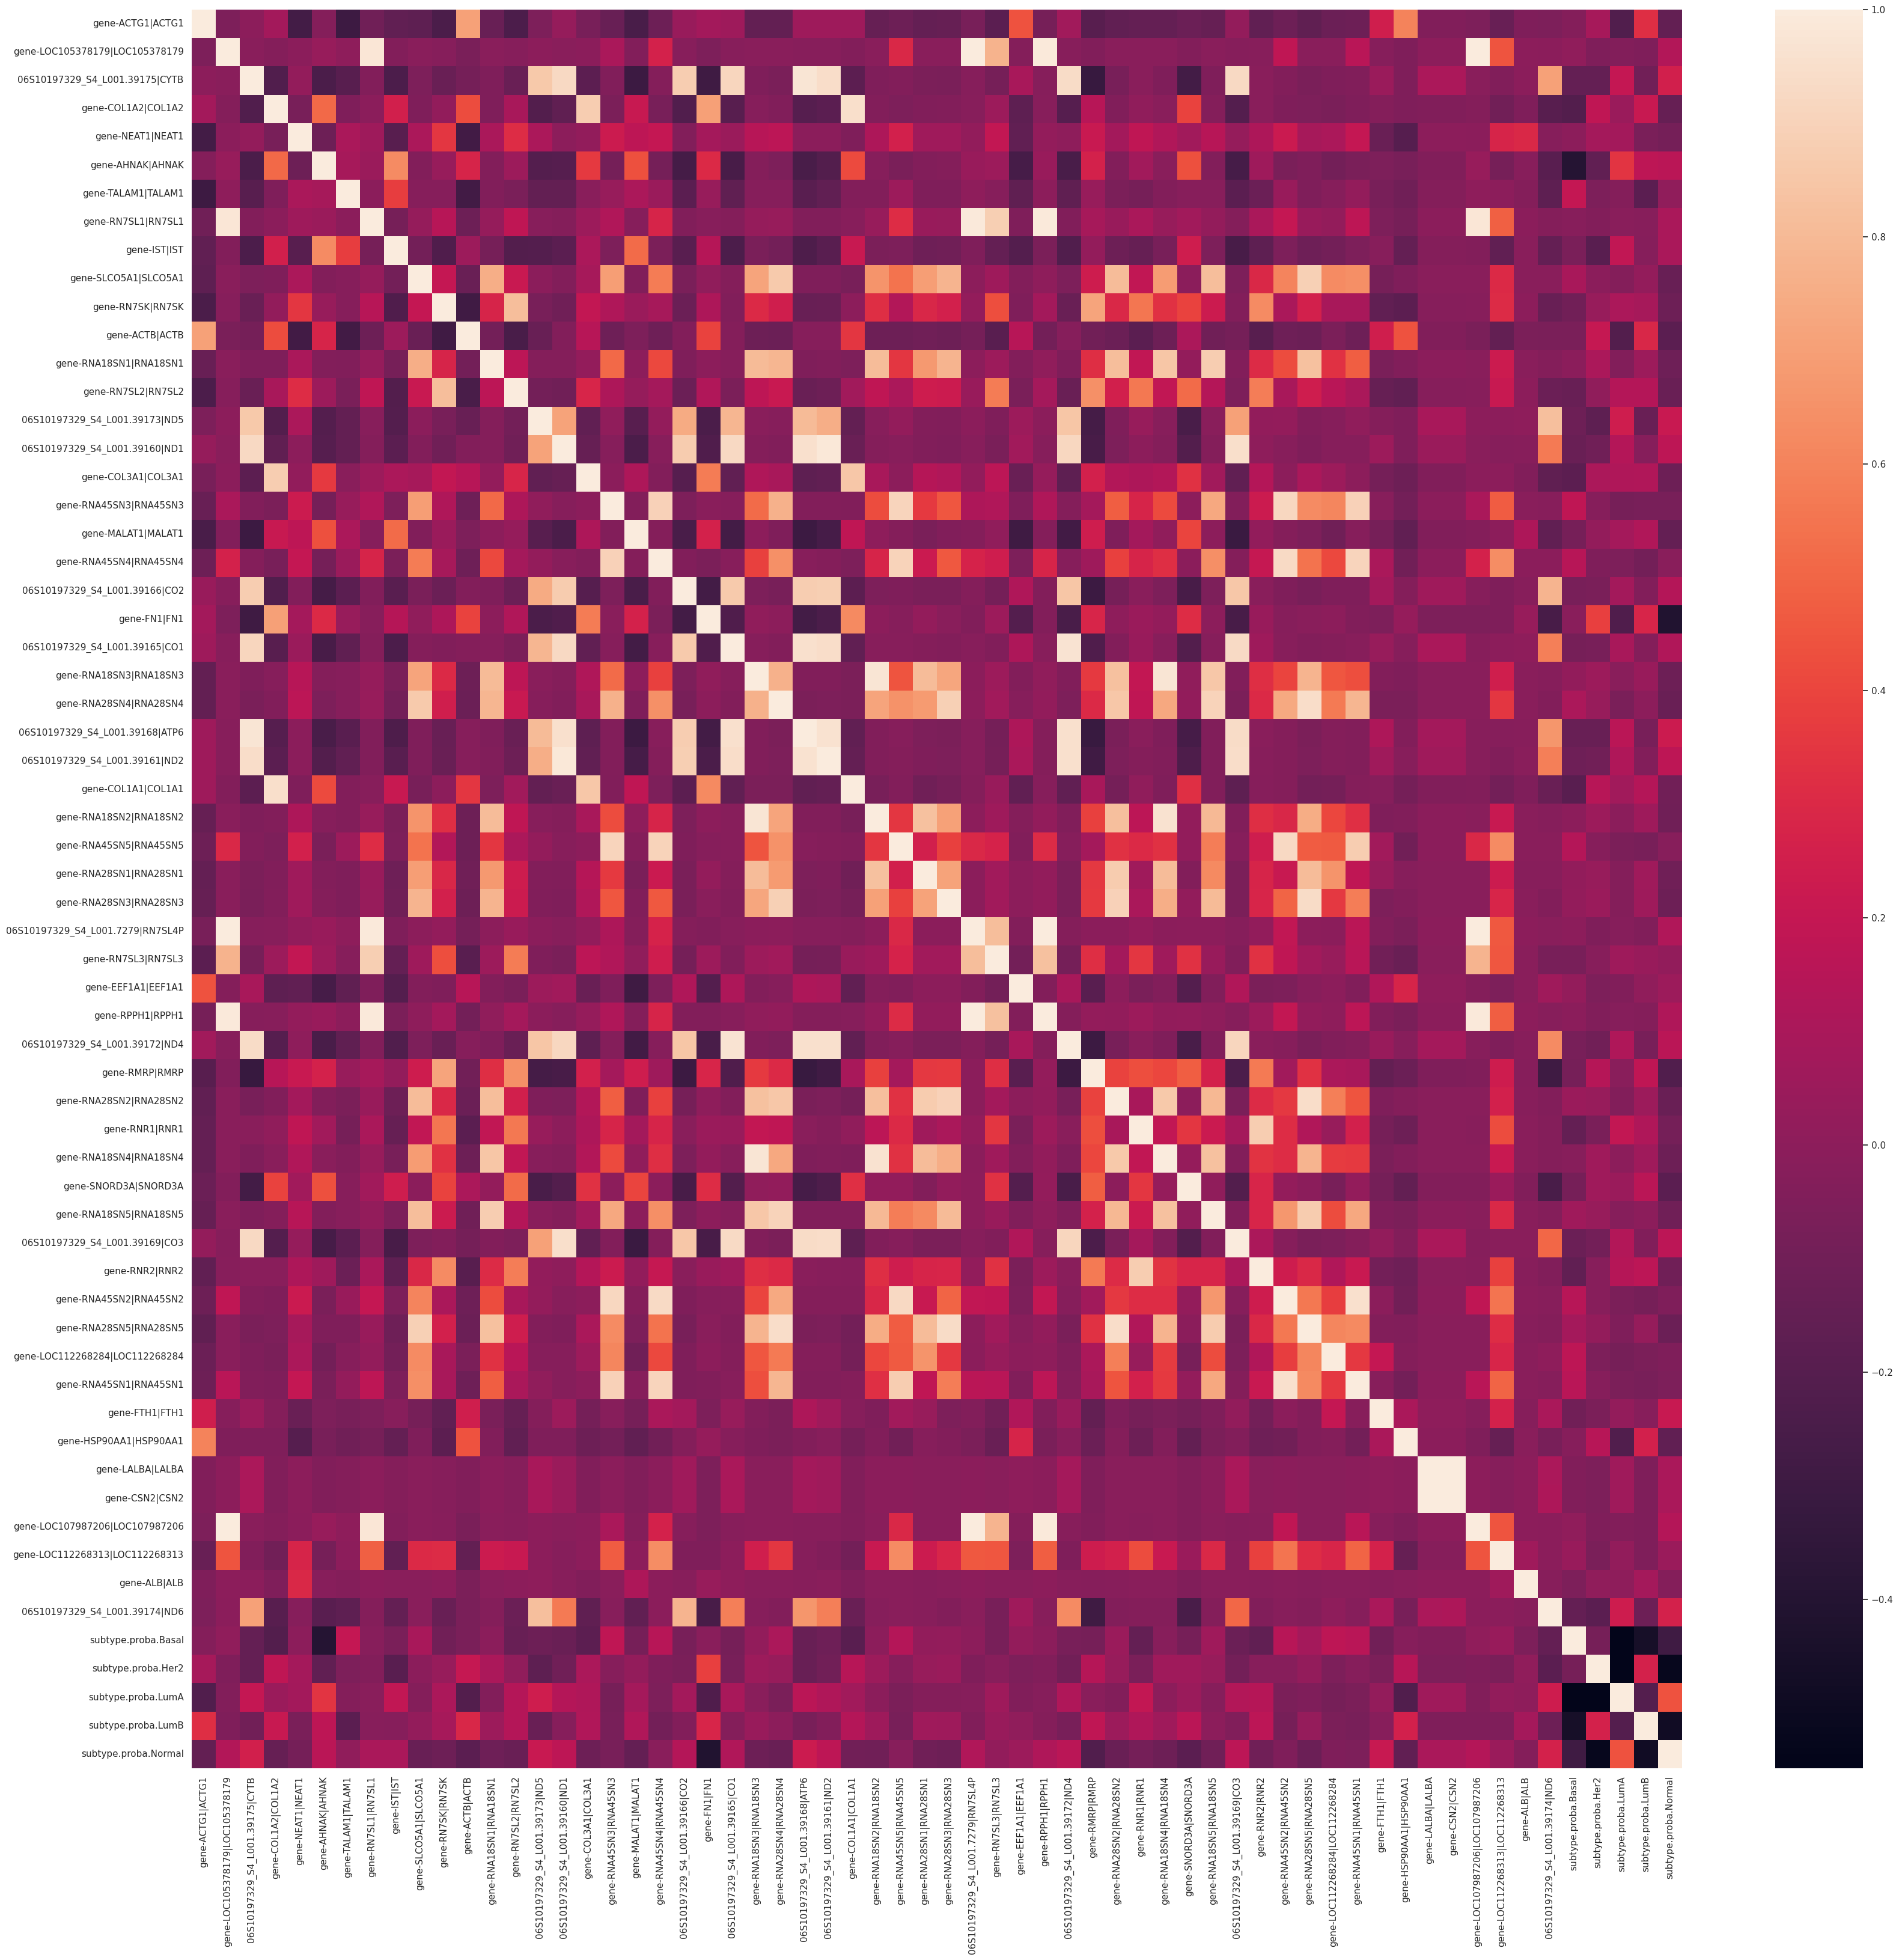

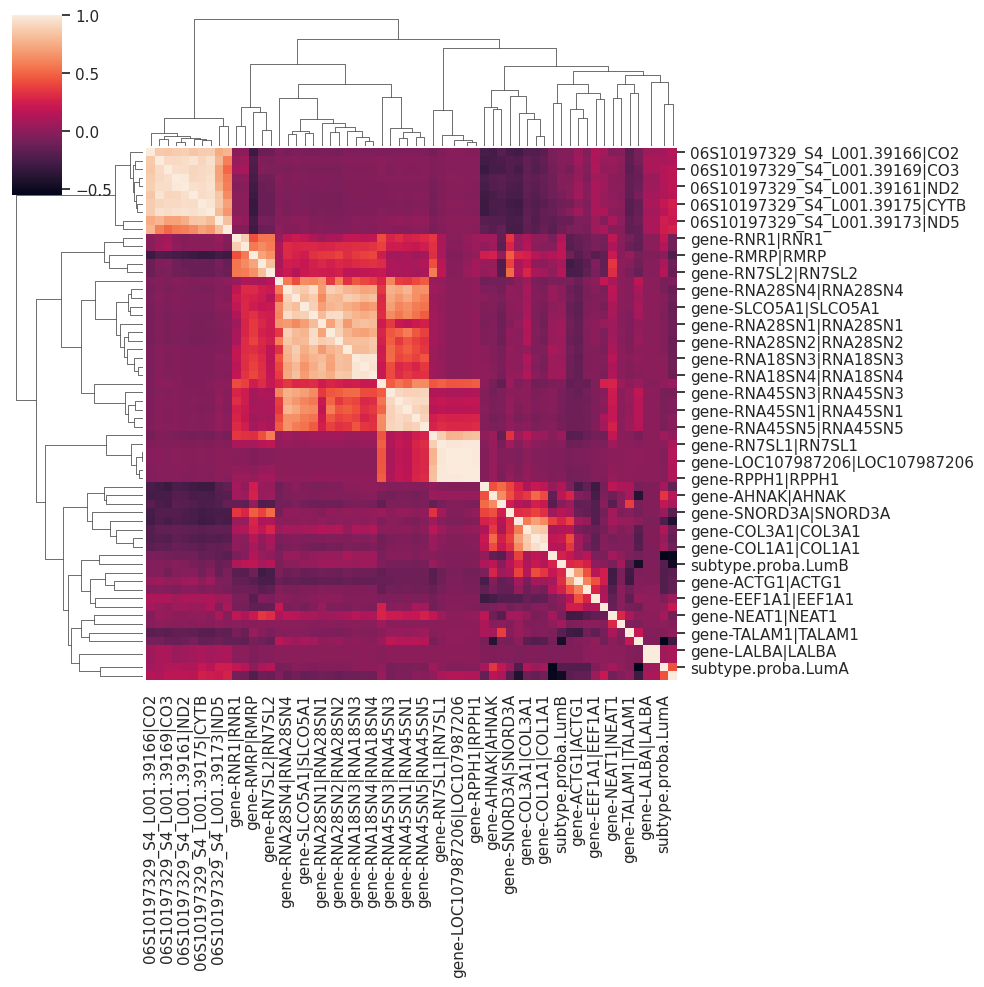

In [ ]:
corr_matrix = breast_cancer.corr()
print(corr_matrix)
sns.set(rc={'figure.figsize':(40,38)})
sns.heatmap(corr_matrix,
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)
sns.set(rc={'figure.figsize':(40,38)})
sns.clustermap(corr_matrix)


In [ ]:
#Esta vez no quite las variables anticorrelacionadas
#eliminar las columnas con probabilidades de subtipo
subtype_sample=['subtype.proba.Normal', 'subtype.proba.LumB', 'subtype.proba.LumA', 'subtype.proba.Her2', 'subtype.proba.Basal', 'sample']
for s in subtype_sample:
  del breast_cancer[s]
breast_cancer.head()

,gene-ACTG1|ACTG1,gene-LOC105378179|LOC105378179,06S10197329_S4_L001.39175|CYTB,gene-COL1A2|COL1A2,gene-NEAT1|NEAT1,gene-AHNAK|AHNAK,gene-TALAM1|TALAM1,gene-RN7SL1|RN7SL1,gene-IST|IST,gene-SLCO5A1|SLCO5A1,...,gene-RNA45SN1|RNA45SN1,gene-FTH1|FTH1,gene-HSP90AA1|HSP90AA1,gene-LALBA|LALBA,gene-CSN2|CSN2,gene-LOC107987206|LOC107987206,gene-LOC112268313|LOC112268313,gene-ALB|ALB,06S10197329_S4_L001.39174|ND6,subtype
0,72567.18596,0.000,114.20387,159357.01537,67.32915,74045.01816,0.00000,581.24657,43752.01487,205.39652,...,6261.61082,59290.55966,28868.86395,0.0,0.0,0.0,443.17921,13.63628,33.23844,LumB
1,75016.80000,0.000,134.86890,165655.90000,84.51786,76579.48000,0.00000,641.07700,47280.55000,215.79030,...,6929.56600,59863.82000,29804.24000,0.0,0.0,0.0,441.47100,10.78951,25.17553,LumB
2,91339.72000,595.142,136.32790,65774.94000,96.83985,71704.74000,0.00000,402.40250,21282.20000,272.65590,...,5168.23900,48685.06000,148613.40000,0.0,0.0,0.0,257.61280,0.00000,39.48809,LumB
3,92308.84195,0.000,92.89719,65806.04755,83.22040,72018.54719,0.00000,458.67988,20833.16272,268.04710,...,4860.65197,48301.70084,148214.56493,0.0,0.0,0.0,275.78854,11.61215,50.31931,LumB
4,92111.15505,0.000,152.12412,64541.86562,69.64719,71427.77310,3114.87883,414.21749,20599.98860,286.83644,...,4714.93133,48008.90622,146690.72358,0.0,0.0,0.0,252.92926,11.91333,43.98770,LumB


In [ ]:
#crear X y Y
X = breast_cancer.drop('subtype', axis=1)
y= breast_cancer['subtype']
y

0       LumB
1       LumB
2       LumB
3       LumB
4       LumB
       ...  
318    Basal
319    Basal
320    Basal
321     LumB
322     LumB
Name: subtype, Length: 323, dtype: object

In [ ]:
#Crear el conjunto de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,  y_test = train_test_split(X, y,
                                                 test_size = 0.30,
                                                 random_state = 33)

#X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state=20)
#X_val,X_test,y_val,y_test = train_test_split(X_test,y_test, test_size = 0.50, random_state=20)

SVM

In [ ]:
#para que no salga un error mas adelante
X_train.dtypes

gene-ACTG1|ACTG1                    float64
gene-LOC105378179|LOC105378179      float64
06S10197329_S4_L001.39175|CYTB      float64
gene-COL1A2|COL1A2                  float64
gene-NEAT1|NEAT1                    float64
gene-AHNAK|AHNAK                    float64
gene-TALAM1|TALAM1                  float64
gene-RN7SL1|RN7SL1                  float64
gene-IST|IST                        float64
gene-SLCO5A1|SLCO5A1                float64
gene-RN7SK|RN7SK                    float64
gene-ACTB|ACTB                      float64
gene-RNA18SN1|RNA18SN1              float64
gene-RN7SL2|RN7SL2                  float64
06S10197329_S4_L001.39173|ND5       float64
06S10197329_S4_L001.39160|ND1       float64
gene-COL3A1|COL3A1                  float64
gene-RNA45SN3|RNA45SN3              float64
gene-MALAT1|MALAT1                  float64
gene-RNA45SN4|RNA45SN4              float64
06S10197329_S4_L001.39166|CO2       float64
gene-FN1|FN1                        float64
06S10197329_S4_L001.39165|CO1   

In [ ]:
# Ajustar el SVM en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 33)
classifier.fit(X_train, y_train)

SVC(random_state=33)

In [ ]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test)
type(y_pred)

numpy.ndarray

In [ ]:
# Elaborar una matriz de confusión para SVM
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# Elaboración de funcion que genera las diferentes metricas rapidamente
def display_metrics(y_true, y_pred):
    '''
    y_true: El vector de la variable dependiente(target)
    y_pred: El vector con las predicciónes hechas por el dataset

    Calcula las diferentes métricas para evaluar el desempeño del modelo
    '''

    recall = recall_score(y_true, y_pred, average='macro')
    pres = precision_score(y_true, y_pred, average='macro')
    accur = accuracy_score(y_true, y_pred)
    f1_scr = f1_score(y_true, y_pred, average='macro')
    conf_mtx = confusion_matrix(y_true, y_pred)
    all_metric = classification_report(y_true, y_pred)

    print(f'Recall: {recall}')
    print(f'Precision: {pres}')
    print(f'Accuracy: {accur}')
    print(f'f1_score: {f1_scr}')
    print('\n')
    print('All metrics:')
    print(all_metric)
    print('\n')
    disp = ConfusionMatrixDisplay(conf_mtx)
    disp.plot()
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: 

Recall: 0.23157894736842105
Precision: 0.2
Accuracy: 0.4020618556701031
f1_score: 0.1642857142857143


All metrics:
              precision    recall  f1-score   support

       Basal       0.40      1.00      0.57        36
        Her2       0.00      0.00      0.00        12
        LumA       0.60      0.16      0.25        19
        LumB       0.00      0.00      0.00        17
      Normal       0.00      0.00      0.00        13

    accuracy                           0.40        97
   macro avg       0.20      0.23      0.16        97
weighted avg       0.27      0.40      0.26        97





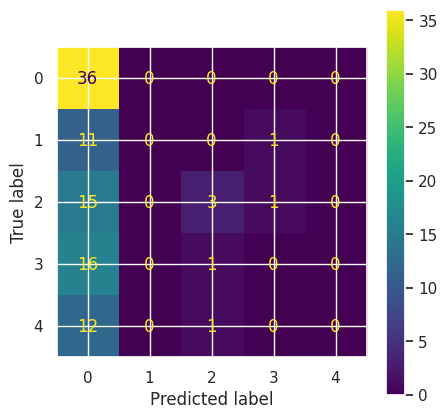

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
display_metrics(y_test, y_pred)

Random Forest

In [ ]:
#se crea el modelo de random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
random_forest = RandomForestClassifier(n_estimators = 500, criterion='entropy', max_depth=None)
# Se entrena el modelo
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [ ]:
#Se hace la predeccion con el dataset de test
y_pred_test_rf = random_forest.predict(X_test)

Recall: 0.5757693630758646
Precision: 0.6263157894736843
Accuracy: 0.6597938144329897
f1_score: 0.5839240043843624


All metrics:
              precision    recall  f1-score   support

       Basal       0.67      0.89      0.76        36
        Her2       0.40      0.17      0.24        12
        LumA       0.73      0.58      0.65        19
        LumB       0.63      0.71      0.67        17
      Normal       0.70      0.54      0.61        13

    accuracy                           0.66        97
   macro avg       0.63      0.58      0.58        97
weighted avg       0.65      0.66      0.64        97





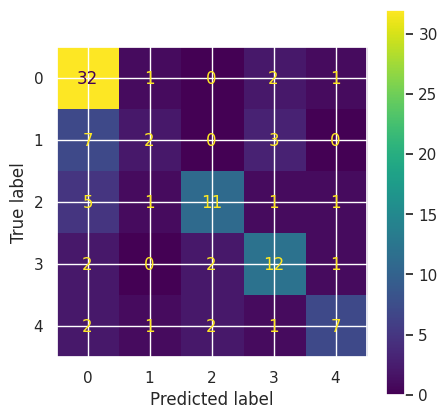

In [ ]:
# Elaborar una matriz de confusión para random forest
sns.set(rc={'figure.figsize':(5,5)})
display_metrics(y_test, y_pred_test_rf)